# Кластеризация: Анализ и выбор оптимальной модели


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-p

[KMEANS] Silhouette Score: 0.515 | Davies-Bouldin Index: 0.708


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


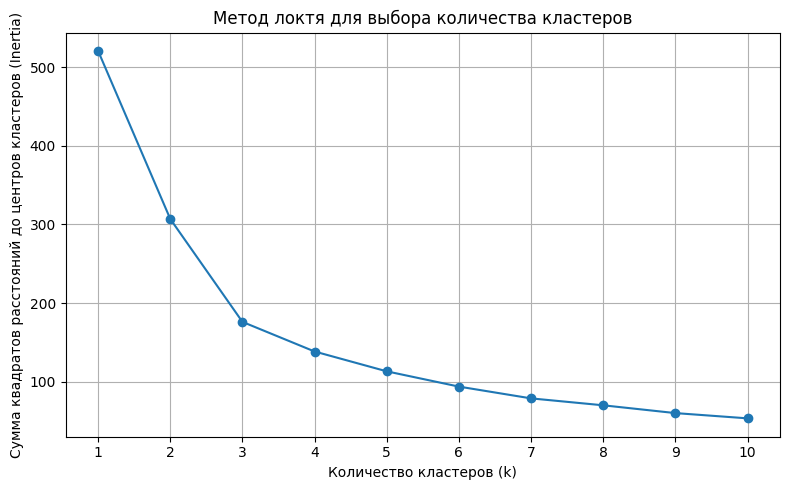

[AGGLOMERATIVE] Silhouette Score: 0.493 | Davies-Bouldin Index: 0.745


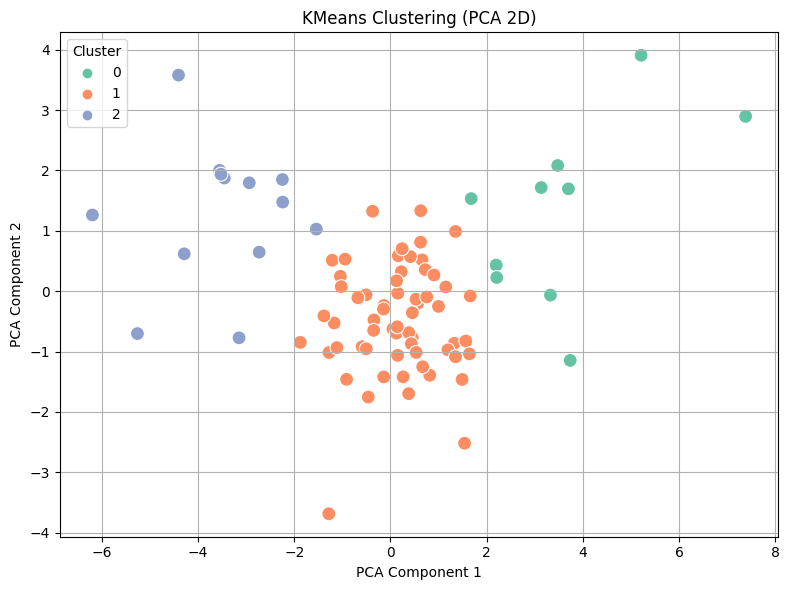

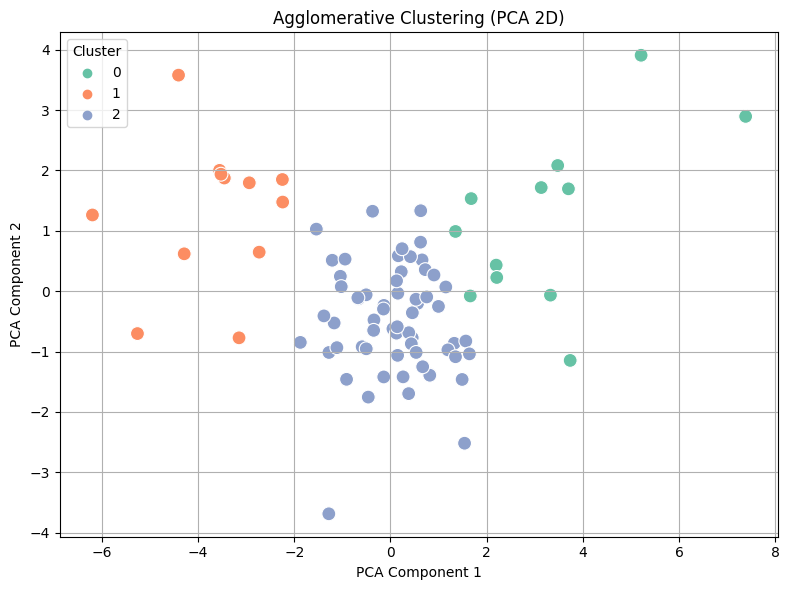


=== Регионы по кластерам: KMEANS_CLUSTER ===

Кластер 0 — 10 регионов:
Республика Калмыкия, Республика Крым, Республика Дагестан, Республика Ингушетия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Чеченская Республика, Ставропольский край, Республика Алтай, Республика Тыва

Кластер 1 — 62 регионов:
Белгородская область, Брянская область, Владимирская область, Воронежская область, Ивановская область, Калужская область, Костромская область, Курская область, Липецкая область, Орловская область, Рязанская область, Смоленская область, Тамбовская область, Тверская область, Тульская область, Ярославская область, Республика Карелия, Республика Коми, Архангельская область, Вологодская область, Калининградская область, Ленинградская область, Новгородская область, Псковская область, Санкт-Петербург, Республика Адыгея, Краснодарский край, Астраханская область, Волгоградская область, Ростовская область, Севастополь, Республика Северная Осетия - Алания, Республика Башкортостан,

In [6]:
# Импорт библиотек
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Загрузка данных ---
df_full = pd.read_csv("../../data/clean/log_master_dataset_2015_2020.csv")
df = df_full.drop_duplicates(subset=["region"], keep="last").reset_index(drop=True)

# --- Выбор признаков ---
features = [
    'log_income_per_capita',
    'log_production_per_capita',
    'log_birth_rate_per_1000',
    'welfare_percent',
    'dependent_percent',
    'log_disabled_rate_per_1000',
    'log_gdp_per_capita',
    'log_retail_per_capita',
    'log_addiction_rate',
    'log_infant_mortality_urban_rate',
    'log_infant_mortality_rural_rate'
]

# --- Масштабирование ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_pca)
sil_k = silhouette_score(X_pca, df['kmeans_cluster'])
dbi_k = davies_bouldin_score(X_pca, df['kmeans_cluster'])
print(f"[KMEANS] Silhouette Score: {sil_k:.3f} | Davies-Bouldin Index: {dbi_k:.3f}")

# --- Метод локтя ---
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Метод локтя для выбора количества кластеров")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Сумма квадратов расстояний до центров кластеров (Inertia)")
plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

# --- Agglomerative ---
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(X_pca)
sil_a = silhouette_score(X_pca, df['agglo_cluster'])
dbi_a = davies_bouldin_score(X_pca, df['agglo_cluster'])
print(f"[AGGLOMERATIVE] Silhouette Score: {sil_a:.3f} | Davies-Bouldin Index: {dbi_a:.3f}")

# --- Визуализация KMeans ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['kmeans_cluster'], palette="Set2", s=100)
plt.title("KMeans Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- Визуализация Agglomerative ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['agglo_cluster'], palette="Set2", s=100)
plt.title("Agglomerative Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

def print_cluster_regions(cluster_col_name):
    print(f"\n=== Регионы по кластерам: {cluster_col_name.upper()} ===")
    clusters = df.groupby(cluster_col_name)['region'].apply(list)
    for cluster_id, region_list in clusters.items():
        print(f"\nКластер {cluster_id} — {len(region_list)} регионов:")
        print(", ".join(region_list))  # все регионы в одну строку
print_cluster_regions('kmeans_cluster')
print_cluster_regions('agglo_cluster')


### Вывод по методам кластеризации

В рамках анализа были опробованы различные подходы к кластеризации с целью выделения социально уязвимых регионов и факторов, ассоциированных с бедностью. Мы провели целенаправленный экспериментальный отбор признаков, настроили количество кластеров и применили несколько алгоритмов кластеризации, а именно:

- **KMeans**
- **Agglomerative Clustering**

Также была применена понижающая размерность с помощью **PCA (до 2 компонент)** для повышения качества кластеризации, устранения мультиколлинеарности и улучшения интерпретируемости результатов.

Мы перебрали:
- различные **наборы признаков**, отобрав только те, которые логически обоснованы и не дублируют друг друга;
- **разное количество кластеров**, ориентируясь на метрики качества и интерпретацию;
- При этом анализ проводился **только по последнему доступному году наблюдений (2020)**, поскольку он отражает **наиболее актуальное социально-экономическое состояние регионов**.

При этом **финальный вариант кластеризации был построен без признака `poverty_percent`**. Это было сделано намеренно, чтобы:
- не "зашумлять" структуру данных прямым индикатором бедности;
- сфокусироваться на **факторах, влияющих на бедность**, а не на самой бедности;
- позже использовать `poverty_percent` для анализа различий **внутри уже сформированных кластеров** — что соответствует задачам, поставленным в брифе.

Для оценки качества кластеризации применялись:
- **Silhouette Score**
- **Davies-Bouldin Index**

Наилучшие результаты показал метод **KMeans с PCA (2 компоненты)** и 3 кластерами:
- Silhouette Score = **0.515**
- Davies-Bouldin Index = **0.708**

Метод **Agglomerative Clustering** дал сопоставимые результаты:
- Silhouette Score = **0.493**
- Davies-Bouldin Index = **0.745**

Оба метода показали устойчивую структуру данных.  
Таким образом, была реализована комплексная методика отбора признаков, настройки параметров, применения нескольких алгоритмов и сравнительной оценки их результатов.


In [7]:
# Добавим кластерные метки на основе df (где регионы уже размечены)
region_clusters = df[["region", "agglo_cluster"]].copy()
df_full = df_full.merge(region_clusters, on="region", how="left")
# Сохраняем в CSV
df_full.to_csv("../../data/clean/df_clusters.csv", index=False)
df_full[["region",'year', "agglo_cluster"]].to_csv("../../data/clean/region_clusters.csv", index=False)

In [8]:
df_full

,year,poverty_percent,region,income_per_capita,real_income,nominal_wage,real_wage,children_percent,elderly_percent,working_age_percent,...,log_disabled_51_60_rate,log_disabled_60_plus_rate,log_alcohol_rate,log_drugs_rate,log_addiction_rate,log_infant_mortality_rural,log_infant_mortality_urban,log_infant_mortality_rural_rate,log_infant_mortality_urban_rate,agglo_cluster
0,2015,8.5,Белгородская область,28043.0,99.3,25456.0,93.2,43.4,11.8,42.3,...,3.137097,4.567983,3.945458,1.098612,3.983413,3.761200,4.234107,1.209288,1.569977,2
1,2016,8.1,Белгородская область,29799.0,100.8,27091.0,100.8,43.4,11.8,42.3,...,3.133742,4.564512,3.852273,0.955511,3.885679,3.610918,4.290459,1.126755,1.643115,2
2,2017,7.8,Белгородская область,30342.0,99.1,29066.0,104.5,43.4,11.8,44.8,...,3.224623,4.608905,3.832980,1.193922,3.881564,3.555348,3.784190,1.178568,1.346834,2
3,2018,7.5,Белгородская область,30778.0,98.7,31852.0,106.8,44.8,12.9,42.3,...,3.159100,4.573870,3.744787,1.435085,3.817712,3.526361,3.713572,1.195373,1.333338,2
4,2019,7.8,Белгородская область,32352.0,100.6,34615.0,104.0,0.0,0.0,0.0,...,3.100072,4.547255,3.842673,1.147402,3.887730,2.833213,3.178054,0.794035,1.008939,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2016,8.6,Чукотский автономный округ,67706.0,97.4,86647.0,99.9,46.9,0.0,49.0,...,2.057410,2.339807,5.805135,0.000000,5.805135,2.197225,1.386294,2.558970,1.699450,1
506,2017,8.5,Чукотский автономный округ,73019.0,103.6,91995.0,102.8,46.9,2.7,50.4,...,2.110417,2.296938,5.541656,1.098612,5.549465,1.791759,1.098612,2.151621,1.396124,1
507,2018,8.8,Чукотский автономный округ,78812.0,104.3,98864.0,104.0,51.0,0.0,49.0,...,2.121757,2.371101,5.345678,0.000000,5.345678,1.791759,1.386294,2.202934,1.763174,1
508,2019,8.5,Чукотский автономный округ,83385.0,101.5,107107.0,102.9,0.0,0.0,0.0,...,2.152641,2.474401,5.682048,0.000000,5.682048,1.609438,1.098612,2.152293,1.569091,1
